In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
#Downloading the Numbers Dataset
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

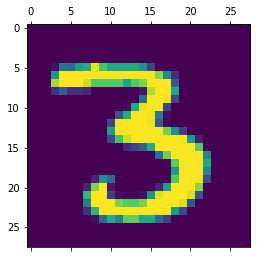

In [3]:
#Taking a peek at the images
plt.matshow(X_train[12])

In [4]:
#standardizing the training and test dataset before putting it into the neural network
X_train = X_train / 255
X_test = X_test / 255

In [5]:
#Flattening the 2-d arrays to 1-d arrays to put into the neural network 
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [6]:
#Loading the model with sigmoid activation and putting in layers
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')])
    
#Declaring optimizers and declaring how to measure success/failure
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
#Loading model
model.fit(X_train_flattened, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 1s 766us/step - loss: 0.4849 - accuracy: 0.8806
Epoch 2/7
1875/1875 [==============================] - 1s 619us/step - loss: 0.3064 - accuracy: 0.9156
Epoch 3/7
1875/1875 [==============================] - 1s 595us/step - loss: 0.2854 - accuracy: 0.9211
Epoch 4/7
1875/1875 [==============================] - 1s 613us/step - loss: 0.2748 - accuracy: 0.9233
Epoch 5/7
1875/1875 [==============================] - 1s 611us/step - loss: 0.2677 - accuracy: 0.9262
Epoch 6/7
1875/1875 [==============================] - 1s 630us/step - loss: 0.2626 - accuracy: 0.9277
Epoch 7/7
1875/1875 [==============================] - 1s 606us/step - loss: 0.2588 - accuracy: 0.9288


In [7]:
#Testing out model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 475us/step - loss: 0.2649 - accuracy: 0.9259


[0.2648787796497345, 0.9258999824523926]

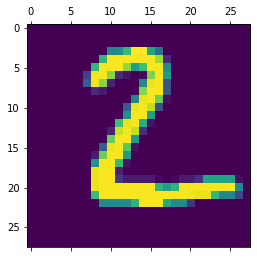

In [8]:
#Checking out a prediction
plt.matshow(X_test[1])

In [9]:
#Checking out prediction from model
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([2.3430586e-04, 1.5720582e-06, 4.8819885e-01, 1.0181324e-04,
       1.1835457e-14, 1.6544163e-03, 1.7400682e-03, 1.2178108e-17,
       5.6326651e-05, 7.4703402e-15], dtype=float32)

In [10]:
#Converting model prediction to integer format (test)
np.argmax(y_predicted[1])

2

In [11]:
#Converting model prediction to integer format for entire list of predictions
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [12]:
#Making Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    5,    2,    3,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,   11,  905,   19,    8,    4,   13,   11,   51,    3],
       [   3,    0,   14,  925,    1,   21,    2,   11,   28,    5],
       [   1,    1,    3,    1,  921,    0,   10,    4,   12,   29],
       [   8,    2,    1,   31,   10,  774,   13,    8,   39,    6],
       [  12,    3,    6,    1,    7,   12,  912,    2,    3,    0],
       [   2,    6,   23,    6,    9,    1,    0,  946,    4,   31],
       [   4,    8,    4,   16,    9,   20,    8,    9,  891,    5],
       [   9,    7,    1,    9,   26,    6,    0,   25,   15,  911]])>

Text(69.0, 0.5, 'Truth')

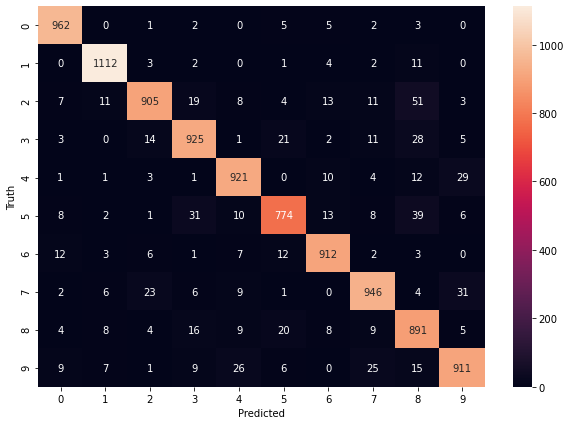

In [13]:
#Mapping out confusion matrix in seaborn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding Hidden Layer

In [14]:
#Loading the model with sigmoid activation and putting in layers (This time with 100 hidden layer and relu activation)
model = keras.Sequential([keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
                        keras.layers.Dense(10,activation = 'sigmoid')])
    
#Declaring optimizers and declaring how to measure success/failure
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Loading model
model.fit(X_train_flattened, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2914 - accuracy: 0.9180
Epoch 2/7
1875/1875 [==============================] - 2s 864us/step - loss: 0.1330 - accuracy: 0.9613
Epoch 3/7
1875/1875 [==============================] - 2s 848us/step - loss: 0.0970 - accuracy: 0.9711
Epoch 4/7
1875/1875 [==============================] - 2s 844us/step - loss: 0.0738 - accuracy: 0.9779
Epoch 5/7
1875/1875 [==============================] - 2s 839us/step - loss: 0.0601 - accuracy: 0.9820
Epoch 6/7
1875/1875 [==============================] - 2s 966us/step - loss: 0.0505 - accuracy: 0.9845
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0413 - accuracy: 0.9871


In [15]:
#Testing out model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 911us/step - loss: 0.0810 - accuracy: 0.9768


[0.08096697926521301, 0.9768000245094299]

Without Hidden Layer it was 92% Effective and with hidden layer it is now 97% effective!!

Text(69.0, 0.5, 'Truth')

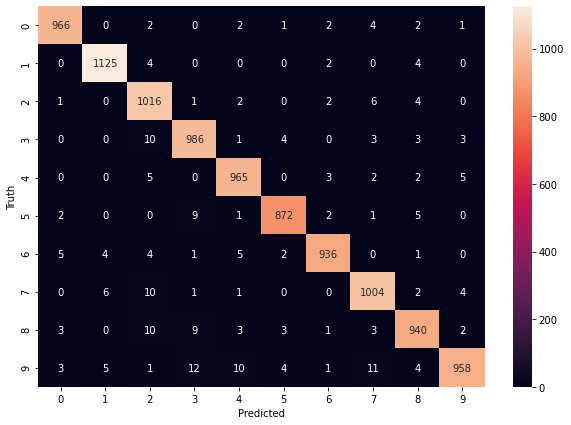

In [16]:
#Doing the same thing as before to map out confusion matrix again
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Trying Out Non-Flattening Keras Variable

In [17]:
#Loading the model with sigmoid activation and putting in layers (This time with 100 hidden layer and relu activation)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')])
    
#Declaring optimizers and declaring how to measure success/failure
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Loading model
model.fit(X_train, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 2s 968us/step - loss: 0.2960 - accuracy: 0.9175
Epoch 2/7
1875/1875 [==============================] - 2s 911us/step - loss: 0.1432 - accuracy: 0.9586
Epoch 3/7
1875/1875 [==============================] - 2s 945us/step - loss: 0.1026 - accuracy: 0.9697
Epoch 4/7
1875/1875 [==============================] - 2s 842us/step - loss: 0.0785 - accuracy: 0.9771
Epoch 5/7
1875/1875 [==============================] - 2s 835us/step - loss: 0.0636 - accuracy: 0.9809
Epoch 6/7
1875/1875 [==============================] - 2s 908us/step - loss: 0.0512 - accuracy: 0.9848
Epoch 7/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0427 - accuracy: 0.9870
